# Decision Tree 사용해보기

## Stage1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe() #이게 더 유용

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Stage2. Feature Engineering  and Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 꽃받침 길이, 너비에 따른 종 분포도

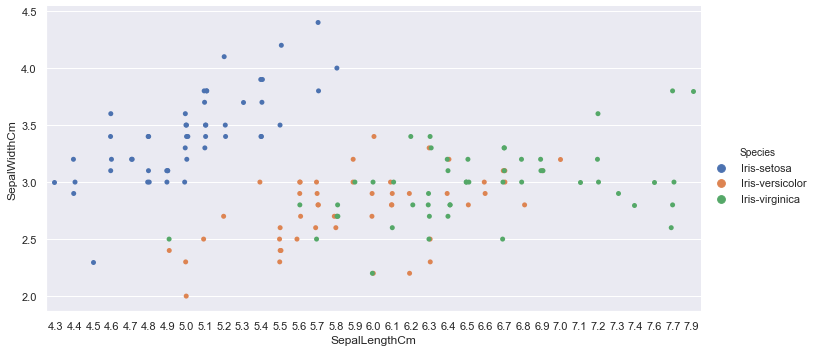

In [6]:
sns.catplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', aspect=2)

### 꽃잎 길이, 너비에 따른 종 분포도

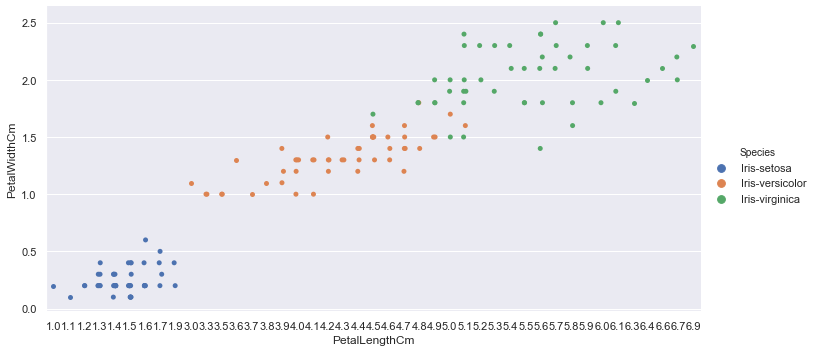

In [7]:
sns.catplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', aspect=2)

### kdeplot으로 꽃받침 길이별 밀집 수준 파악

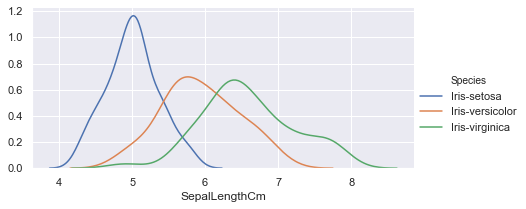

In [8]:
facet = sns.FacetGrid(df, hue='Species', aspect=2)
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend()
plt.show()

### box plot으로 종별 꽃받침 길이 범위 파악

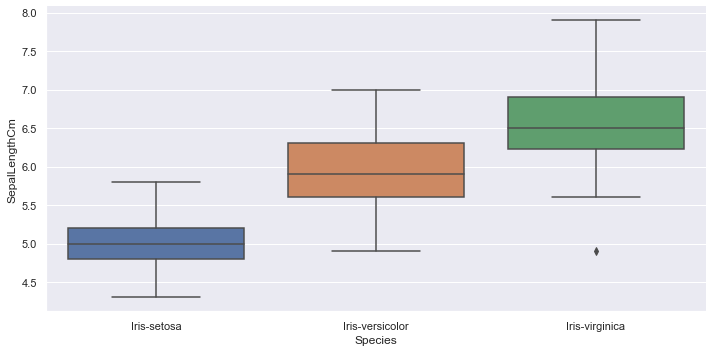

In [9]:
sns.catplot(kind='box', data=df, x='Species', y='SepalLengthCm', aspect=2)

### violin plot으로 종별 꽃받침 길이 범위 파악

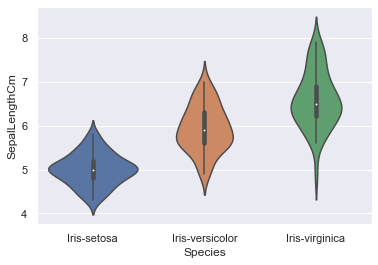

In [10]:
sns.violinplot(data=df, x='Species', y='SepalLengthCm')

### violin plot으로 종별 꽃받침 너비 범위 파악

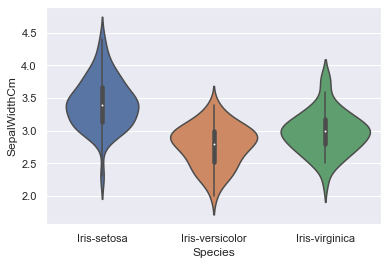

In [11]:
sns.violinplot(data=df, x='Species', y='SepalWidthCm')

### violin plot으로  꽃잎 길이 범위 파악

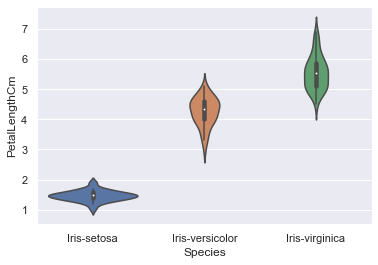

In [12]:
sns.violinplot(data=df, x='Species', y='PetalLengthCm')

### violin plot으로 종별 꽃잎 너비 범위 파악

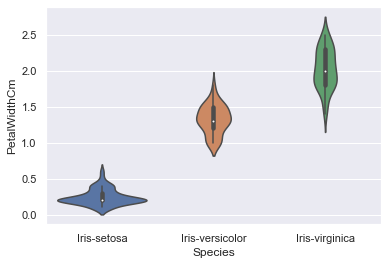

In [13]:
sns.violinplot(data=df, x='Species', y='PetalWidthCm')

### pair plot 만들기

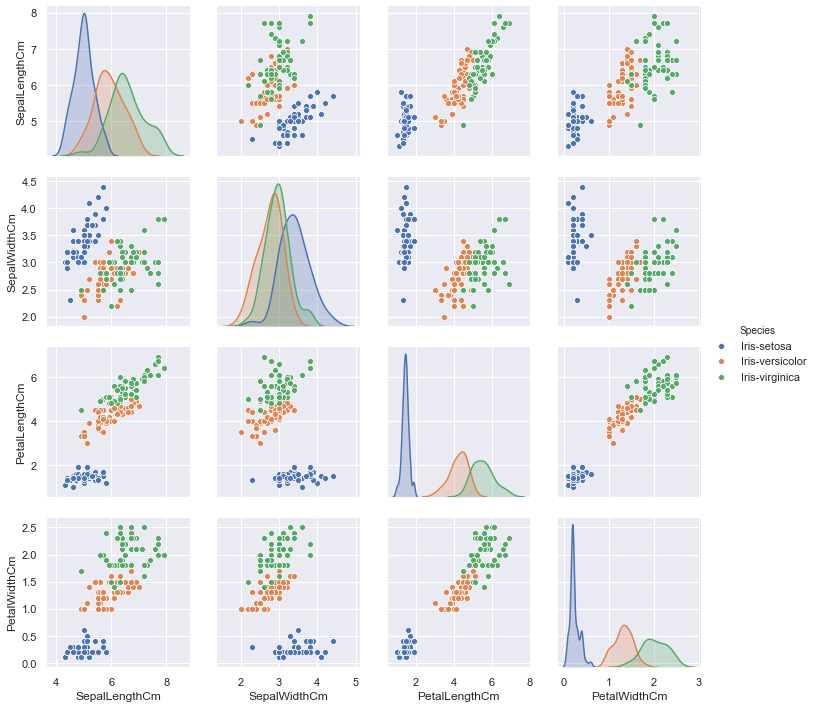

In [14]:
sns.pairplot(data=df, hue='Species', 
             x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
            y_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

## Stage3. Scikit-learn으로 Decision Tree 구현하기

- 데이터 보유량이 150개로 적으므로 validation set 만들지 않음
- training set과 test set으로만 나누기

### training set과 validation set 나누기

In [15]:
from sklearn.model_selection import train_test_split

# train data에는 Survived 없애주기
train_data = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# target으로 삼는 데이터는 Survived
target_data = df['Species']

#자동으로 75%, 25%로 나눠줌
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data)

print(train_data.shape, x_train.shape, x_test.shape)
print(train_data.shape, y_train.shape, y_test.shape)

(150, 5) (112, 5) (38, 5)
(150, 5) (112,) (38,)


## Decision Tree 모델링

파라미터 | 기본값 | 의미 | 영향 | 적정값
:-- | :-- | :-- | :-- | :--
n_estimators | 10 혹은 100 | Decision Tree의 개수 | 작을수록 overfitting 완화 | 클수록 좋음. 다만 클수록 학습이 느려지고 모델이 비대해지며 더 많은 컴퓨팅 지원을 필요로함.
max_depth | 무제한 | Decision Tree의 깊이 | 클수록 트리가 복잡해져 overfitting 심화. 따라서 깊이를 조절해 과적합 문제 해결 | 직접 수를 넣어보며 경험적으로 설정
max_features | sqrt(특징 개수) | . | 작을수록 트리가 복잡해짐 | 이미 적정값 설정되어 있음. 특별히 최적화할 것이 아니라면 수정할 필요 없음

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=1)
tree.fit(x_train, y_train)
print('train acciracy:', tree.score(x_train, y_train))
print('test accuracy:', tree.score(x_test, y_test))

train acciracy: 0.6785714285714286
test accuracy: 0.631578947368421


In [17]:
# 만들어진 DecisionTree로 test 데이터 판단해줘
predict  = tree.predict(x_test)
predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [18]:
result=pd.DataFrame({
    'Id': x_test['Id'],
    'Species': predict
})

result.to_csv('data/iris_submit_tree.csv',index=False)

my_prediction = pd.read_csv('data/iris_submit_tree.csv')
my_prediction.head()

,Id,Species
0,117,Iris-versicolor
1,96,Iris-versicolor
2,59,Iris-versicolor
3,36,Iris-setosa
4,92,Iris-versicolor
